# Objective
* The main objective of the project is to identify the optimal location for a business in Haiti, specifically in the West Department. This can be a new business or an extension of an existing business in the form of a branch office.

# Data Source

* The data used for this project comes from several sources, first of all to have all the companies in the western department I had to do some web scraping and then for the demographic information I had access to the results of a survey conducted by the <b>Office For The Coordination Of Humanitarian Affairs</b> on the density of the Haitian population by department and by municipality.

* Other information such as average per capita income, total activity rate, and tax revenues by department were obtained via articles on the Haitian economy.

### Importing Libraries

In [1259]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### Loading Dataset

In [1260]:
#Loading Business Data Files
kenscoff       = pd.read_excel('business_paup.xlsx', sheet_name='kenscoff')
paup           = pd.read_excel('business_paup.xlsx', sheet_name='paup')
carrefour      = pd.read_excel('business_paup.xlsx', sheet_name='carrefour')
delmas         = pd.read_excel('business_paup.xlsx', sheet_name='delmas')
crxdesbouquets = pd.read_excel('business_paup.xlsx', sheet_name='crxdesbouquets')
tabarre        = pd.read_excel('business_paup.xlsx', sheet_name='tabarre')
leogane        = pd.read_excel('business_paup.xlsx', sheet_name='leogane')
petitgoave     = pd.read_excel('business_paup.xlsx', sheet_name='petit_goave')
grandgoave     = pd.read_excel('business_paup.xlsx', sheet_name='grand_goave')
cabaret        = pd.read_excel('business_paup.xlsx', sheet_name='cabaret')
arcahaie       = pd.read_excel('business_paup.xlsx', sheet_name='arcahaie')
ganthier       = pd.read_excel('business_paup.xlsx', sheet_name='ganthier')
gressier       = pd.read_excel('business_paup.xlsx', sheet_name='gressier')

#Population dataset file
population     = pd.read_excel('hti-pop-statistics.xlsx')

#Municipality geo location
commune_geolocalisation = pd.read_excel('hti_commune_geolocation.xlsx')

In [1261]:
# Business Dataset file concatenation
dataset = pd.concat([paup,carrefour,delmas,kenscoff,crxdesbouquets,tabarre,
                     leogane,petitgoave,grandgoave,cabaret,arcahaie,ganthier,gressier])
display(dataset.shape)
display(dataset.head())

(3166, 6)

,adm2code,commune,name,secteur activite,category,address
0,HT0111,Port-au-Prince,Association Médicale Haïtienne (AMH),sante,ASSOCIATIONS PROFESSIONNELLES,"29, 1° avenue du Travail, Bois Verna, Port-au..."
1,HT0111,Port-au-Prince,Cabinet Munitio,service professionnel,AVOCATS ET CONSEILLERS JURIDIQUES,"42 bis, rue Villemenay, Bois Verna, Port-au-P..."
2,HT0111,Port-au-Prince,Berling s.a.,agroalimentaire,"RHUM,\t\t\t\t\t\t\t\t\t\t\tVINS ET SPIRITUEUX","Route Nationale #1, Sarthe 57, Port-au-Prince"
3,HT0111,Port-au-Prince,JEAN-GILLES André (Dr),sante,OPHTALMOLOGUES,"97, rue Oswald Durand, Clinique Médico-Chirurg..."
4,HT0111,Port-au-Prince,Kay Etienne,agroalimentaire,PROVISIONS ALIMENTAIRES,"101 rue l. Salomon, marché Salomon (après le s..."


In [1263]:
pd.pivot_table(data=dataset,index='adm2code',columns='secteur activite',aggfunc='count')

address                                               \
secteur activite agroalimentaire artisanat commerce construction distribution   
adm2code                                                                        
HT0111                     100.0      29.0     71.0        133.0         14.0   
HT0112                      21.0      10.0     10.0         72.0          NaN   
HT0113                      18.0       6.0      4.0         18.0          NaN   
HT0115                       5.0       3.0      1.0          3.0          NaN   
HT0116                       3.0       NaN      NaN          3.0          NaN   
HT0118                      22.0       3.0     10.0         46.0          NaN   
HT0121                       2.0       NaN      1.0          5.0          NaN   
HT0122                       NaN       NaN      NaN          5.0          NaN   
HT0123                       NaN       NaN      1.0          NaN          NaN   
HT0131                       9.0       NaN      NaN         13.0          NaN   
HT0133                       1.0       NaN      NaN          1.0          NaN   
HT0141                       1.0       NaN      NaN          1.0          NaN   
HT0142                       NaN       NaN      NaN          3.0          NaN   

                                                                           \
secteur activite edition education energie fashion industrie informatique   
adm2code                                                                    
HT0111              62.0      82.0    36.0    64.0      20.0         74.0   
HT0112              20.0      33.0    16.0    41.0       5.0         41.0   
HT0113               5.0       9.0     6.0     5.0       3.0          2.0   
HT0115               1.0       2.0     NaN     3.0       NaN          NaN   
HT0116               NaN       NaN     NaN     1.0       1.0          NaN   
HT0118               2.0       3.0     7.0    10.0       2.0         12.0   
HT0121               1.0       1.0     NaN     NaN       NaN          3.0   
HT0122               1.0       NaN     NaN     NaN       2.0          NaN   
HT0123               NaN       NaN     NaN     NaN       NaN          NaN   
HT0131               1.0       NaN     2.0     NaN       3.0          2.0   
HT0133               NaN       NaN     NaN     NaN       NaN          NaN   
HT0141               1.0       NaN     NaN     NaN       NaN          NaN   
HT0142               NaN       1.0     NaN     NaN       NaN          NaN   

                                                                       \
secteur activite loisirs maintenance maison funeraire medias mobilier   
adm2code                                                                
HT0111               5.0        17.0             14.0   42.0     50.0   
HT0112               2.0         7.0              2.0   31.0     10.0   
HT0113               3.0         4.0              3.0    3.0      7.0   
HT0115               1.0         NaN              1.0    NaN      1.0   
HT0116               NaN         NaN              NaN    NaN      NaN   
HT0118               3.0         6.0              2.0    3.0     15.0   
HT0121               NaN         NaN              NaN    2.0      NaN   
HT0122               NaN         NaN              NaN    1.0      NaN   
HT0123               NaN         NaN              NaN    NaN      NaN   
HT0131               NaN         NaN              NaN    1.0      4.0   
HT0133               NaN         NaN              NaN    NaN      NaN   
HT0141               NaN         NaN              NaN    NaN      NaN   
HT0142               NaN         NaN              NaN    NaN      NaN   

                                                                               \
secteur activite multi secteur musique restauration  sante service automobile   
adm2code                                                                        
HT0111                    17.0     7.0         93.0  534.0              175.0   
HT

In [ ]:
da

In [1235]:
#Selecting the needed column
dataset=dataset.reset_index()
dataset = dataset.loc[:,['index','adm2code','commune','secteur activite','category']]
dataset.head()

,index,adm2code,commune,secteur activite,category
0,0,HT0111,Port-au-Prince,sante,ASSOCIATIONS PROFESSIONNELLES
1,1,HT0111,Port-au-Prince,service professionnel,AVOCATS ET CONSEILLERS JURIDIQUES
2,2,HT0111,Port-au-Prince,agroalimentaire,"RHUM,\t\t\t\t\t\t\t\t\t\t\tVINS ET SPIRITUEUX"
3,3,HT0111,Port-au-Prince,sante,OPHTALMOLOGUES
4,4,HT0111,Port-au-Prince,agroalimentaire,PROVISIONS ALIMENTAIRES


In [1236]:
display(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   code_iso3       140 non-null    object
 1   adm0_fr         140 non-null    object
 2   adm1code        140 non-null    object
 3   adm1_fr         140 non-null    object
 4   adm2code        140 non-null    object
 5   adm2_fr         140 non-null    object
 6   Population      140 non-null    int64 
 7   Femmes          140 non-null    int64 
 8   Hommes          140 non-null    int64 
 9   Enfants         140 non-null    int64 
 10  Adultes         140 non-null    int64 
 11  Filles          140 non-null    int64 
 12  Garcons         140 non-null    int64 
 13  Femmes adultes  140 non-null    int64 
 14  Hommes adultes  140 non-null    int64 
dtypes: int64(9), object(6)
memory usage: 16.5+ KB


None

In [1237]:
final_population = population.iloc[:,4:15]
final_population.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,142250
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,111037
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,16346


### Additional Information
* According to the academy of economic development the activity rate in haiti is 66.73% and according to the world bank the employment rate is 55% so we can say that on average the employment rate per commune is 55%. 
* According to the World Bank the RNB per capita is  $823.00 with an exchange rate of HTG 95 the average annual income per capita is HTG 78,185.00

In [1238]:
final_population['income']= (((final_population['Population']*0.6673)*0.55)*68.5).astype('int')

In [1239]:
final_population.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes,income
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844,25937733
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187,10383917
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,142250,13433614
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,111037,9899811
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,16346,1508859


# Data Visualization

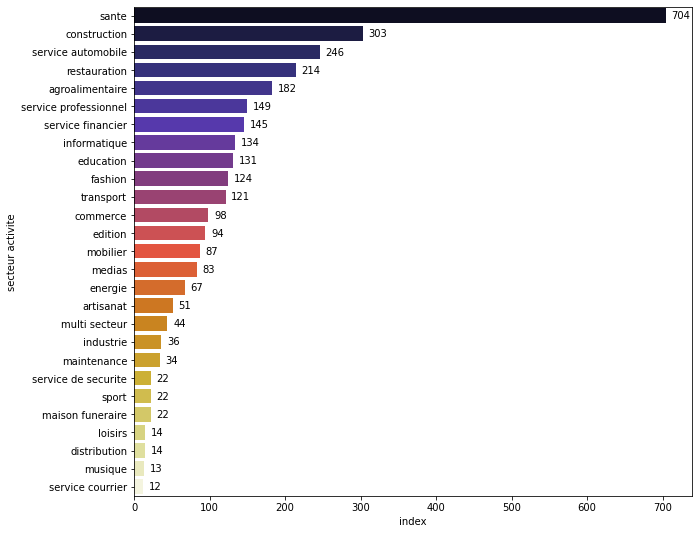

In [1240]:
#business distribution by sector of activity
secteur=dataset.groupby(by='secteur activite').index.count().to_frame()
secteur=secteur.sort_values(by='index', ascending=False)
plt.figure(figsize=(10,9))
ax=sns.barplot(y=secteur.index,x='index', palette="CMRmap", data=secteur)
for container in ax.containers:
    ax.bar_label(container,padding=5.8)


# for p in ax.patches:
#     percentage = '{:.1f}%'.format(p.get_width())
#     y = p.get_x() + p.get_width()/2 # + 0.02
#     x = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (y, x), clip_on=True, weight='bold', color='red', fontsize=10)


In [1241]:
#Fonction to create  pivot table and bar chat to visualize sector of activity by municipality
def table_bar(secteur=''):
    commune=dataset[dataset['secteur activite']==secteur].pivot_table(index='commune', columns='secteur activite', values='index', aggfunc='count')
    commune=commune.sort_values(by=secteur, ascending=False)
    plt.figure(figsize=(8,6))
    ax = sns.barplot(y=commune.index,x=secteur, palette="CMRmap", data=commune)
    for container in ax.containers:
        ax.bar_label(container, padding=2.5)
    return commune  

In [1242]:
def depedency(col, data = dataset):
  tb = pd.crosstab(telco_data[col], telco_data["Churn"], normalize=False)
  chi2, pval, dof, expected = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:

    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")
  return cramers_stat(col= col)

### Business Of The Health Sector By Municipality

secteur activite,sante
commune,
Port-au-Prince,534
Delmas,94
Carrefour,33
Tabarre,25
Croix-Des-Bouquets,8
Léogâne,4
Gressier,3
Kenscoff,2
Arcahaie,1


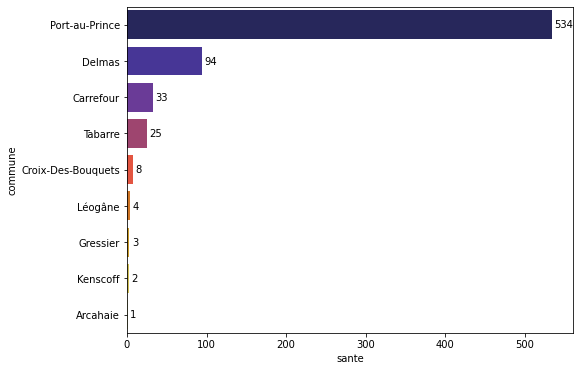

In [1243]:
table_bar(secteur='sante')

### Business Of The Construction Sector By Municipality

secteur activite,construction
commune,
Port-au-Prince,133
Delmas,72
Tabarre,46
Carrefour,18
Croix-Des-Bouquets,13
Léogâne,5
Petit-Goâve,5
Cabaret,3
Gressier,3


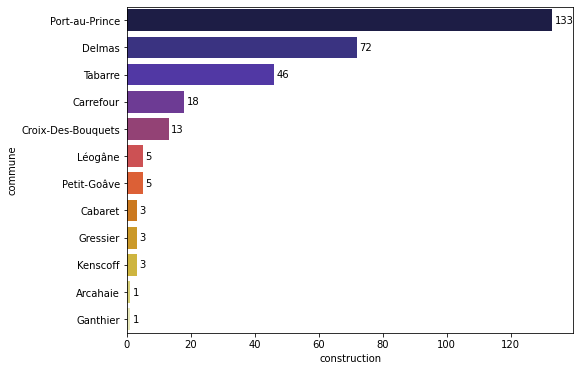

In [1244]:
table_bar('construction')

### Automobile Sector Activity By Municipality

secteur activite,service automobile
commune,
Port-au-Prince,175
Delmas,34
Tabarre,21
Carrefour,11
Croix-Des-Bouquets,3
Gressier,1
Léogâne,1


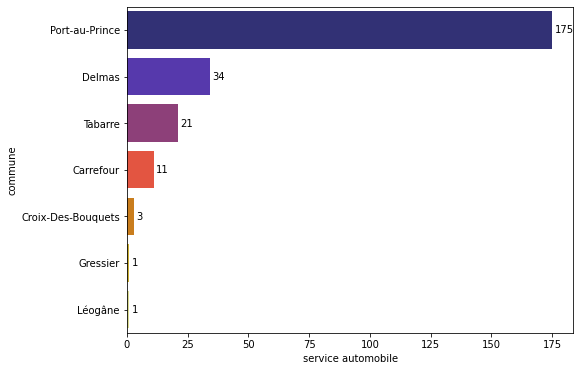

In [1245]:
table_bar('service automobile')

### Restaurant Business By Municipality

secteur activite,restauration
commune,
Port-au-Prince,93
Delmas,48
Tabarre,24
Carrefour,20
Kenscoff,16
Croix-Des-Bouquets,5
Léogâne,4
Grand-Goâve,2
Petit-Goâve,2


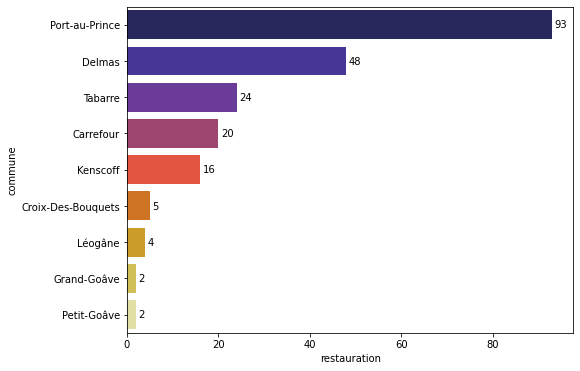

In [1246]:
table_bar('restauration')

### Agri-food Sector Activity By Municipality

secteur activite,agroalimentaire
commune,
Port-au-Prince,100
Tabarre,22
Delmas,21
Carrefour,18
Croix-Des-Bouquets,9
Kenscoff,5
Gressier,3
Léogâne,2
Arcahaie,1


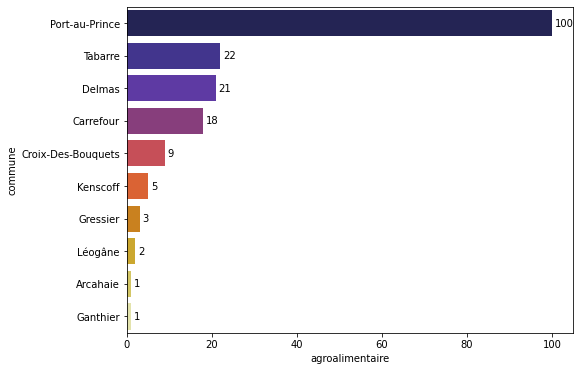

In [1247]:
table_bar('agroalimentaire')

### Professional Sector Activity By Municipality

secteur activite,service professionnel
commune,
Port-au-Prince,100
Delmas,30
Carrefour,4
Tabarre,4
Petit-Goâve,3
Croix-Des-Bouquets,2
Léogâne,2
Arcahaie,1
Grand-Goâve,1


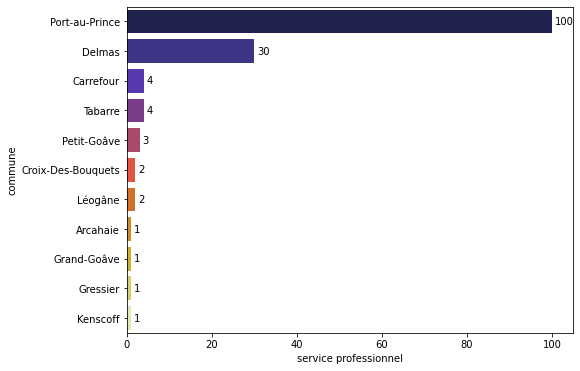

In [1248]:
table_bar('service professionnel')

### Financial Sector Business By Municipality

secteur activite,service financier
commune,
Port-au-Prince,67
Delmas,33
Carrefour,18
Tabarre,8
Croix-Des-Bouquets,6
Léogâne,4
Petit-Goâve,4
Cabaret,2
Gressier,2


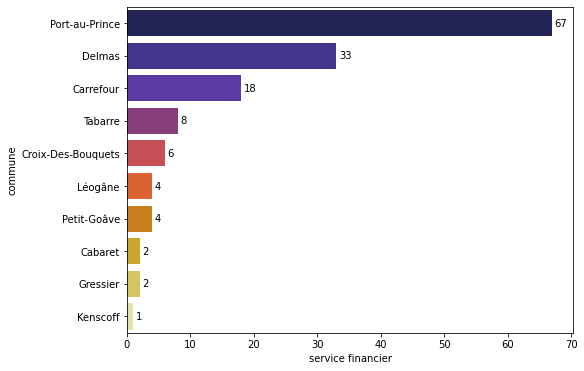

In [1249]:
table_bar('service financier')

### IT Business By Municipality

secteur activite,informatique
commune,
Port-au-Prince,74
Delmas,41
Tabarre,12
Léogâne,3
Carrefour,2
Croix-Des-Bouquets,2


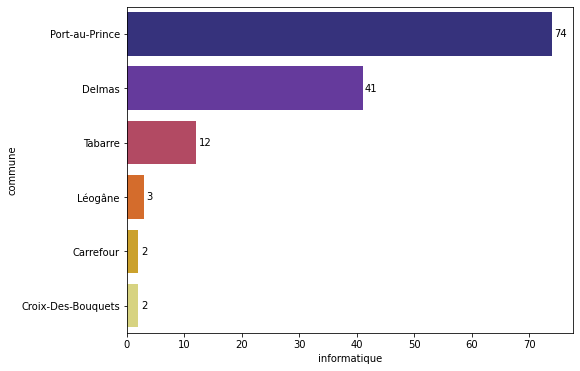

In [1250]:
table_bar('informatique')

### Education Sector Activity By Municipality

secteur activite,education
commune,
Port-au-Prince,82
Delmas,33
Carrefour,9
Tabarre,3
Kenscoff,2
Cabaret,1
Léogâne,1


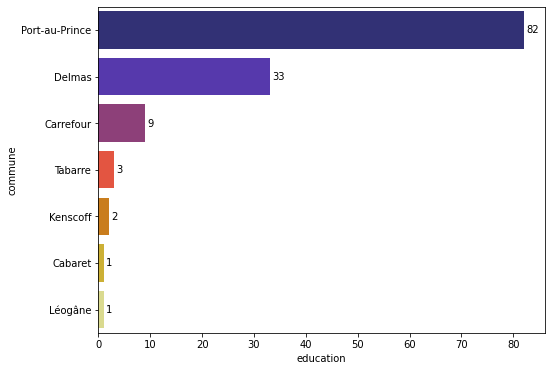

In [1251]:
table_bar('education')

### Fashion Sector Activity By Municipality

secteur activite,fashion
commune,
Port-au-Prince,64
Delmas,41
Tabarre,10
Carrefour,5
Kenscoff,3
Gressier,1


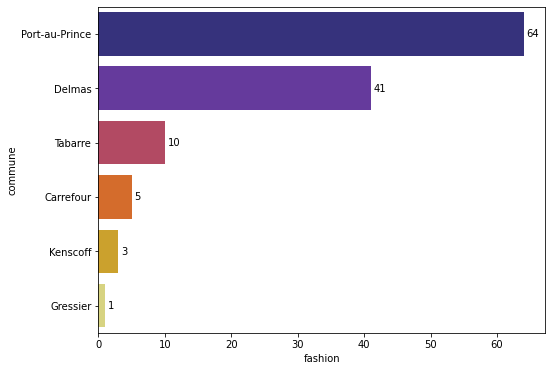

In [1252]:
table_bar('fashion')

### Transportation Sector Activity by Municipality

secteur activite,transport
commune,
Port-au-Prince,90
Delmas,17
Tabarre,12
Carrefour,2


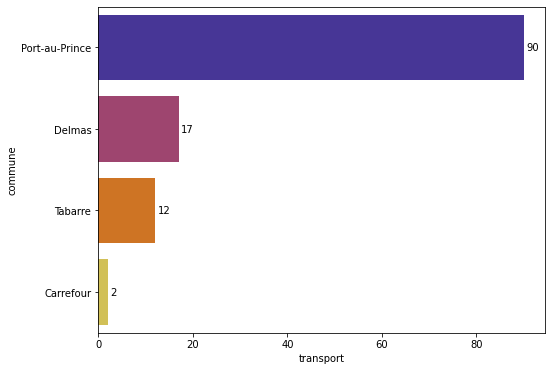

In [1253]:
table_bar('transport')

In [1254]:
display(final_population.head(2))
display(final_population.info())
#display(commune_geolocalisation.head(2))
#display(dataset.head(2))

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes,income
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844,25937733
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187,10383917


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   adm2code        140 non-null    object
 1   adm2_fr         140 non-null    object
 2   Population      140 non-null    int64 
 3   Femmes          140 non-null    int64 
 4   Hommes          140 non-null    int64 
 5   Enfants         140 non-null    int64 
 6   Adultes         140 non-null    int64 
 7   Filles          140 non-null    int64 
 8   Garcons         140 non-null    int64 
 9   Femmes adultes  140 non-null    int64 
 10  Hommes adultes  140 non-null    int64 
 11  income          140 non-null    int32 
dtypes: int32(1), int64(9), object(2)
memory usage: 12.7+ KB


None

In [1255]:
#Tranform Femmes to Dummies Interval
final_population['Femmes_0_30000']=final_population['Femmes'].apply(lambda x : 1 if (x<=30000) else 0)
final_population['Femmes_30000_65000']=final_population['Femmes'].apply(lambda x : 1 if (x>30000 and x<=65000) else 0)
final_population['Femmes_65000_100000']=final_population['Femmes'].apply(lambda x : 1 if (x>65000 and x<=100000) else 0)
final_population['Femmes_100000_250000']=final_population['Femmes'].apply(lambda x : 1 if (x>100000 and x<=250000) else 0)
final_population['Femmes_250000_550000']=final_population['Femmes'].apply(lambda x : 1 if (x>250000 and x<=550000) else 0)

#Transform Hommes to Dummies Interval
final_population['Hommes_0_30000']=final_population['Hommes'].apply(lambda x : 1 if (x<=30000) else 0)
final_population['Hommes_30000_65000']=final_population['Hommes'].apply(lambda x : 1 if (x>30000 and x<=65000) else 0)
final_population['Hommes_65000_100000']=final_population['Hommes'].apply(lambda x : 1 if (x>65000 and x<=100000) else 0)
final_population['Hommes_100000_250000']=final_population['Hommes'].apply(lambda x : 1 if (x>100000 and x<=250000) else 0)
final_population['Hommes_250000_500000']=final_population['Hommes'].apply(lambda x : 1 if (x>250000 and x<=500000) else 0)

#Transform Income to Dummies Interval
final_population['Income_0_1000000']=final_population['income'].apply(lambda x : 1 if (x<=1000000) else 0)
final_population['Income_1000000_10000000']=final_population['income'].apply(lambda x : 1 if (x>1000000 and x<=10000000) else 0)
final_population['Income_10000000_30000000']=final_population['income'].apply(lambda x : 1 if (x>10000000 and x<=30000000) else 0)

In [1256]:
popdummies=final_population[['adm2code','Femmes_0_30000','Femmes_30000_65000','Femmes_65000_100000','Femmes_100000_250000','Femmes_250000_550000','Hommes_0_30000','Hommes_30000_65000','Hommes_65000_100000','Hommes_100000_250000','Hommes_250000_500000','Income_0_1000000','Income_1000000_10000000','Income_10000000_30000000']]
popdummies.head()

,adm2code,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000
0,HT0111,0,0,0,0,1,0,0,0,0,1,0,0,1
1,HT0112,0,0,0,1,0,0,0,0,1,0,0,0,1
2,HT0113,0,0,0,0,1,0,0,0,0,1,0,0,1
3,HT0114,0,0,0,1,0,0,0,0,1,0,0,1,0
4,HT0115,1,0,0,0,0,0,1,0,0,0,0,1,0


In [1257]:
dummiestest= pd.get_dummies(dataset['secteur activite'])
dummiestest['adm2code']= dataset['adm2code']
dummiestest['commune']= dataset['commune']
fcol = dummiestest.pop('adm2code')
tcol=dummiestest.pop('commune')
dummiestest.insert(0, 'adm2code', fcol)
dummiestest.insert(1, 'commune', tcol)
dummiestest.head(2)

,adm2code,commune,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport
0,HT0111,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,HT0111,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1258]:
f_merge= pd.merge(left=dummiestest,right=popdummies,on='adm2code', how='inner')
f_merge=f_merge.drop(['adm2code'],1)
f_merge.head()

,commune,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000
0,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,Port-au-Prince,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,Port-au-Prince,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [1220]:
group=f_merge.groupby(by='commune').mean()
group.shape

(13, 40)

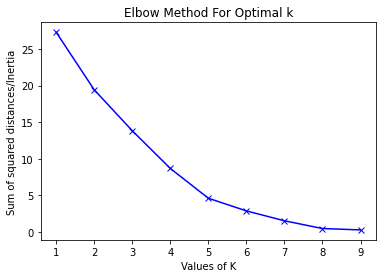

In [1221]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
# X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
# plt.scatter(X1,X2)
# plt.show()

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(group)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [1222]:
model = KMeans(n_clusters=5).fit(group)

In [1223]:
group['labels'] = model.labels_
group['labels'].values

array([3, 0, 4, 1, 1, 0, 3, 2, 0, 1, 3, 4, 0])

In [1224]:
group.head()

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arcahaie,0.166667,0.000000,0.000000,0.166667,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0,0,1,0,0,0,0,1,0,0,0,1,0,3
Cabaret,0.000000,0.000000,0.000000,0.428571,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
Carrefour,0.092308,0.030769,0.020513,0.092308,0.0,0.025641,0.046154,0.030769,0.025641,0.015385,0.010256,0.015385,0.020513,0.015385,0.015385,0.035897,0.025641,0.005128,0.102564,0.169231,0.056410,0.010256,0.010256,0.092308,0.020513,0.005128,0.010256,0,0,0,0,1,0,0,0,0,1,0,0,1,4
Croix-Des-Bouquets,0.147541,0.000000,0.000000,0.213115,0.0,0.016393,0.000000,0.032787,0.000000,0.049180,0.032787,0.000000,0.000000,0.000000,0.016393,0.065574,0.000000,0.000000,0.081967,0.131148,0.049180,0.016393,0.000000,0.098361,0.032787,0.016393,0.000000,0,0,0,1,0,0,0,0,1,0,0,1,0,1
Delmas,0.034146,0.016260,0.016260,0.117073,0.0,0.032520,0.053659,0.026016,0.066667,0.008130,0.066667,0.003252,0.011382,0.003252,0.050407,0.016260,0.022764,0.004878,0.078049,0.152846,0.055285,0.006504,0.021138,0.053659,0.048780,0.006504,0.027642,0,0,0,1,0,0,0,0,1,0,0,0,1,1


In [1225]:
group[group['labels']==0]

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cabaret,0.000000,0.000000,0.000000,0.428571,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
Ganthier,0.500000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
Kenscoff,0.119048,0.071429,0.023810,0.071429,0.0,0.023810,0.047619,0.000000,0.071429,0.000000,0.000000,0.023810,0.00000,0.023810,0.000000,0.023810,0.02381,0.000000,0.380952,0.047619,0.000000,0.000000,0.000000,0.023810,0.023810,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,1,0,0
Tabarre,0.087302,0.011905,0.039683,0.182540,0.0,0.007937,0.011905,0.027778,0.039683,0.007937,0.047619,0.011905,0.02381,0.007937,0.011905,0.059524,0.02381,0.007937,0.095238,0.099206,0.083333,0.000000,0.003968,0.031746,0.015873,0.011905,0.047619,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [1226]:
group[group['labels']==1]

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Croix-Des-Bouquets,0.147541,0.00000,0.00000,0.213115,0.0,0.016393,0.000000,0.032787,0.000000,0.04918,0.032787,0.000000,0.000000,0.000000,0.016393,0.065574,0.000000,0.000000,0.081967,0.131148,0.049180,0.016393,0.000000,0.098361,0.032787,0.016393,0.000000,0,0,0,1,0,0,0,0,1,0,0,1,0,1
Delmas,0.034146,0.01626,0.01626,0.117073,0.0,0.032520,0.053659,0.026016,0.066667,0.00813,0.066667,0.003252,0.011382,0.003252,0.050407,0.016260,0.022764,0.004878,0.078049,0.152846,0.055285,0.006504,0.021138,0.053659,0.048780,0.006504,0.027642,0,0,0,1,0,0,0,0,1,0,0,0,1,1
Léogâne,0.062500,0.00000,0.03125,0.156250,0.0,0.031250,0.031250,0.000000,0.000000,0.00000,0.093750,0.000000,0.000000,0.000000,0.062500,0.000000,0.031250,0.000000,0.125000,0.125000,0.031250,0.031250,0.000000,0.125000,0.062500,0.000000,0.000000,0,0,0,1,0,0,0,0,1,0,0,1,0,1


In [1227]:
group[group['labels']==2]

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gressier,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.066667,0.0,0.0,0.133333,0.066667,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,2


In [1228]:
group[group['labels']==3]

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arcahaie,0.166667,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.166667,0.00,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,3
Grand-Goâve,0.000000,0.0,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.4,0.000000,0.0,0.200000,0.0,0.0,0.200000,0.00,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,3
Petit-Goâve,0.000000,0.0,0.0,0.250000,0.0,0.050000,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.1,0.000000,0.0,0.050000,0.0,0.2,0.150000,0.05,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,3


In [1229]:
group[group['labels']==4]

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Carrefour,0.092308,0.030769,0.020513,0.092308,0.000000,0.025641,0.046154,0.030769,0.025641,0.015385,0.010256,0.015385,0.020513,0.015385,0.015385,0.035897,0.025641,0.005128,0.102564,0.169231,0.056410,0.010256,0.010256,0.092308,0.020513,0.005128,0.010256,0,0,0,0,1,0,0,0,0,1,0,0,1,4
Port-au-Prince,0.052247,0.015152,0.037095,0.069488,0.007315,0.032393,0.042842,0.018809,0.033438,0.010449,0.038662,0.002612,0.008882,0.007315,0.021944,0.026123,0.008882,0.003657,0.048589,0.278997,0.091432,0.000000,0.003135,0.035005,0.052247,0.006270,0.047022,0,0,0,0,1,0,0,0,0,1,0,0,1,4


In [1230]:
group[group['labels']==5]

,agroalimentaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service professionnel,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
